# EJERCICIOS

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

Tamaño del conjunto de entrenamiento: (50000, 32, 32, 3)
Tamaño del conjunto de validación: (5000, 32, 32, 3)
Tamaño del conjunto de prueba: (5000, 32, 32, 3)
Clases disponibles: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


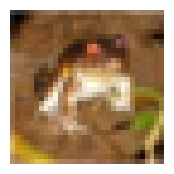

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_temp, y_temp) = tf.keras.datasets.cifar10.load_data()

# Dividir en conjunto de validación y prueba
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Convertir etiquetas a formato categórico
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# Mostrar información sobre los datos
print(f"Tamaño del conjunto de entrenamiento: {x_train.shape}")
print(f"Tamaño del conjunto de validación: {x_val.shape}")
print(f"Tamaño del conjunto de prueba: {x_test.shape}")
print(f"Clases disponibles: {set(y_temp.flatten())}")

# Mostrar una imagen del conjunto de entrenamiento
plt.figure(figsize=(2, 2))
plt.imshow(x_train[0])  # Mostrar la primera imagen del conjunto de entrenamiento
plt.axis('off')
plt.show()


In [19]:
print ('num GPU available: '), len(tf.config.experimental.list_physical_devices('GPU'))

num GPU available: 


(None, 0)

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.activations import swish

# Crear el modelo
model = models.Sequential()

# Capa de entrada
model.add(tf.keras.layers.Input(shape=(32, 32, 3))) # Entrada para imágenes de tamaño 32x32 en color
model.add(layers.Flatten())  # Aplana las imágenes en un vector 1D


In [21]:
# 20 capas ocultas con 100 neuronas cada una
for _ in range(20):
    model.add(layers.Dense(100, activation=swish, kernel_initializer="he_normal"))

# Capa de salida
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida (para CIFAR-10)

In [22]:
# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [23]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Cargar los datos CIFAR-10
(x_train, y_train), (x_temp, y_temp) = tf.keras.datasets.cifar10.load_data()

# Dividir los datos de prueba y validación
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)

# No es necesario convertir las etiquetas a one-hot, ya que estamos usando SparseCategoricalCrossentropy
# Solo aseguramos que las etiquetas estén en el formato correcto
# y_train, y_val, y_test ya son números enteros, por lo que no se necesita to_categorical

# Crear el modelo
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # Entrada para imágenes de tamaño 32x32 en color
for _ in range(20):
    model.add(Dense(100, activation='swish', kernel_initializer="he_normal"))

# Capa de salida
model.add(Dense(10, activation='softmax'))  # 10 clases de salida (para CIFAR-10)

# Definir las tasas de aprendizaje a probar
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]

# Variables para almacenar la mejor tasa de aprendizaje y el mejor rendimiento
best_lr = None
best_val_accuracy = 0
best_results = {}

# Bucle para probar diferentes tasas de aprendizaje
for lr in learning_rates:
    model.compile(optimizer=Nadam(learning_rate=lr),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=[SparseCategoricalAccuracy()])
    
    # Entrenar el modelo y medir el tiempo
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val),
                        batch_size=32, verbose=0)
    end_time = time.time()
    
    # Obtener las métricas de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    # Actualizar el mejor resultado si este es mejor que el anterior
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_lr = lr
        best_results = {
            'Red neuronal normal': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': end_time - start_time
            }
        }

# Imprimir el mejor resultado
print("Mejor tasa de aprendizaje:", best_lr)
print("Mejores resultados:")
print(best_results)


Mejor tasa de aprendizaje: 0.0001
Mejores resultados:
{'Red neuronal normal': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.42574000358581543, 'Validación sparse categorical accuracy': 0.4180000126361847, 'Tiempo total (s)': 101.39207625389099}}


### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [24]:
# Configurar el optimizador con la mejor tasa de aprendizaje
optimizer = Nadam(learning_rate=best_lr)

# Recompilar el modelo con el optimizador ajustado
model.compile(optimizer=optimizer,
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

# Crear el callback de detención temprana
early_stopping_cb = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, restore_best_weights=True)

# Configurar los callbacks
callbacks = [early_stopping_cb]

# Entrenar el modelo con la detención temprana y medir el tiempo
start_time = time.time()
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val),
                    batch_size=32, verbose=0, callbacks=callbacks)
end_time = time.time()

# Evaluar el modelo
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

# Obtener la mejor época a partir del callback
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

# Guardar los resultados en el diccionario
final_results = {
    'Red neuronal normal con detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': end_time - start_time,
        'Mejor época': best_epoch
    }
}

# Imprimir los resultados finales
print("Resultados finales:")
print(final_results)


Resultados finales:
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10000000149011612, 'Validación sparse categorical accuracy': 0.10140000283718109, 'Tiempo total (s)': 65.14705920219421, 'Mejor época': 1}}


### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [26]:
from tensorflow.keras.layers import BatchNormalization

# Crear el modelo con BatchNormalization
model_with_bn = Sequential()
model_with_bn.add(Flatten(input_shape=(32, 32, 3)))  # Entrada para imágenes de tamaño 32x32 en color
for _ in range(20):
    model_with_bn.add(Dense(100, kernel_initializer="he_normal"))
    model_with_bn.add(BatchNormalization())  # Normalización antes de la activación
    model_with_bn.add(tf.keras.layers.Activation('swish'))  # Función de activación

# Capa de salida
model_with_bn.add(Dense(10, activation='softmax'))  # 10 clases de salida (para CIFAR-10)


In [27]:
# Repetimos C
# Definir las tasas de aprendizaje a probar
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]

# Variables para almacenar la mejor tasa de aprendizaje y el mejor rendimiento
best_lr = None
best_val_accuracy = 0
best_results_bn = {}

# Bucle para probar diferentes tasas de aprendizaje
for lr in learning_rates:
    # Compilar el modelo con la tasa de aprendizaje actual
    model_with_bn.compile(optimizer=Nadam(learning_rate=lr),
                          loss=SparseCategoricalCrossentropy(),
                          metrics=[SparseCategoricalAccuracy()])
    
    # Entrenar el modelo y medir el tiempo
    start_time = time.time()
    history = model_with_bn.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val),
                                batch_size=32, verbose=0)
    end_time = time.time()
    
    # Obtener las métricas de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    # Actualizar el mejor resultado si este es mejor que el anterior
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_lr = lr
        best_results_bn = {
            'Red neuronal con BatchNormalization': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': end_time - start_time
            }
        }

# Imprimir los mejores resultados
print("Mejor tasa de aprendizaje con BatchNormalization:", best_lr)
print("Resultados del mejor modelo con BatchNormalization:")
print(best_results_bn)


Mejor tasa de aprendizaje con BatchNormalization: 0.001
Resultados del mejor modelo con BatchNormalization:
{'Red neuronal con BatchNormalization': {'Tasa de aprendizaje': 0.001, 'Entrenamiento sparse categorical accuracy': 0.5537400245666504, 'Validación sparse categorical accuracy': 0.4758000075817108, 'Tiempo total (s)': 166.10377979278564}}


In [28]:
# Repetimos D
# Configurar el optimizador con la mejor tasa de aprendizaje
optimizer = Nadam(learning_rate=best_lr)

# Recompilar el modelo con el optimizador ajustado
model_with_bn.compile(optimizer=optimizer,
                      loss=SparseCategoricalCrossentropy(),
                      metrics=[SparseCategoricalAccuracy()])

# Crear el callback de detención temprana
early_stopping_cb = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, restore_best_weights=True)

# Configurar los callbacks
callbacks = [early_stopping_cb]

# Entrenar el modelo con la detención temprana y medir el tiempo
start_time = time.time()
history = model_with_bn.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val),
                            batch_size=32, verbose=0, callbacks=callbacks)
end_time = time.time()

# Evaluar el modelo
train_loss, train_acc = model_with_bn.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model_with_bn.evaluate(x_val, y_val, verbose=0)

# Calcular la mejor época alcanzada durante el entrenamiento
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

# Guardar los resultados en el diccionario
final_results_bn = {
    'Red neuronal con BatchNormalization y detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': end_time - start_time,
        'Mejor época': best_epoch
    }
}

# Imprimir los resultados finales
print("Resultados finales con BatchNormalization y detención temprana:")
print(final_results_bn)

Resultados finales con BatchNormalization y detención temprana:
{'Red neuronal con BatchNormalization y detención temprana': {'Tasa de aprendizaje': 0.001, 'Entrenamiento sparse categorical accuracy': 0.5569000244140625, 'Validación sparse categorical accuracy': 0.5230000019073486, 'Tiempo total (s)': 379.7791166305542, 'Mejor época': 20}}


### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [31]:
# Estandarizar los datos manualmente (restar la media y dividir por la desviación estándar)
mean = np.mean(x_train, axis=(0, 1, 2, 3))  # Media global
std = np.std(x_train, axis=(0, 1, 2, 3))    # Desviación estándar global

x_train_standardized = (x_train - mean) / std
x_val_standardized = (x_val - mean) / std
x_test_standardized = (x_test - mean) / std


In [32]:
from tensorflow.keras.initializers import lecun_normal

# Crear el modelo con SELU y LeCun Normal
model_with_selu = Sequential()
model_with_selu.add(Flatten(input_shape=(32, 32, 3)))  # Entrada para imágenes de tamaño 32x32 en color
for _ in range(20):
    model_with_selu.add(Dense(100, activation='selu', kernel_initializer=lecun_normal()))  # Activación SELU

# Capa de salida
model_with_selu.add(Dense(10, activation='softmax'))  # 10 clases de salida (para CIFAR-10)


c:\Users\GABRI\Anaconda3\envs\ia\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
#Repetimos C
# Definir las tasas de aprendizaje a probar
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]

# Variables para almacenar la mejor tasa de aprendizaje y el mejor rendimiento
best_lr = None
best_val_accuracy = 0
best_results_selu = {}

# Bucle para probar diferentes tasas de aprendizaje
for lr in learning_rates:
    # Compilar el modelo con la tasa de aprendizaje actual
    model_with_selu.compile(optimizer=Nadam(learning_rate=lr),
                            loss=SparseCategoricalCrossentropy(),
                            metrics=[SparseCategoricalAccuracy()])
    
    # Entrenar el modelo y medir el tiempo
    start_time = time.time()
    history = model_with_selu.fit(x_train_standardized, y_train, epochs=10, validation_data=(x_val_standardized, y_val),
                                  batch_size=32, verbose=0)
    end_time = time.time()
    
    # Obtener las métricas de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    # Actualizar el mejor resultado si este es mejor que el anterior
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_lr = lr
        best_results_selu = {
            'Red neuronal con SELU': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': end_time - start_time
            }
        }

# Imprimir los mejores resultados
print("Mejor tasa de aprendizaje con SELU:", best_lr)
print("Resultados del mejor modelo con SELU:")
print(best_results_selu)


Mejor tasa de aprendizaje con SELU: 0.0001
Resultados del mejor modelo con SELU:
{'Red neuronal con SELU': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.5877199769020081, 'Validación sparse categorical accuracy': 0.5016000270843506, 'Tiempo total (s)': 81.02356696128845}}


In [34]:
# Repetimos D
# Configurar el optimizador con la mejor tasa de aprendizaje
optimizer = Nadam(learning_rate=best_lr)

# Recompilar el modelo con el optimizador ajustado
model_with_selu.compile(optimizer=optimizer,
                        loss=SparseCategoricalCrossentropy(),
                        metrics=[SparseCategoricalAccuracy()])

# Configurar los callbacks para la detención temprana
callbacks = [
    EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, restore_best_weights=True)
]

# Entrenar el modelo con la detención temprana y medir el tiempo
start_time = time.time()
history = model_with_selu.fit(x_train_standardized, y_train, epochs=50, validation_data=(x_val_standardized, y_val),
                              batch_size=32, verbose=0, callbacks=callbacks)
end_time = time.time()

# Evaluar el modelo
train_loss, train_acc = model_with_selu.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model_with_selu.evaluate(x_val, y_val, verbose=0)

# Obtener las métricas finales y la mejor época
train_acc = history.history['sparse_categorical_accuracy'][-1]
val_acc = history.history['val_sparse_categorical_accuracy'][-1]
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

# Guardar los resultados en el diccionario
final_results_selu = {
    'Red neuronal con SELU y detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': end_time - start_time,
        'Mejor época': best_epoch
    }
}

# Imprimir los resultados finales
print("Resultados finales con SELU y detención temprana:")
print(final_results_selu)


Resultados finales con SELU y detención temprana:
{'Red neuronal con SELU y detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10047999769449234, 'Validación sparse categorical accuracy': 0.09359999746084213, 'Tiempo total (s)': 54.85791611671448, 'Mejor época': 20}}


### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [35]:
from tensorflow.keras.layers import Dropout

# Crear el modelo con SELU, LeCun Normal y Dropout
model_with_selu_dropout = Sequential()
model_with_selu_dropout.add(Flatten(input_shape=(32, 32, 3)))  # Entrada para imágenes de tamaño 32x32 en color
for _ in range(20):
    model_with_selu_dropout.add(Dense(100, activation='selu', kernel_initializer=lecun_normal()))
# Añadir Dropout antes de la última capa
model_with_selu_dropout.add(Dropout(0.5))  # Probabilidad de desactivar el 50% de las neuronas
# Capa de salida
model_with_selu_dropout.add(Dense(10, activation='softmax'))  # 10 clases de salida (para CIFAR-10)


In [36]:
# Repetimos C
# Definir las tasas de aprendizaje a probar
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]

# Variables para almacenar la mejor tasa de aprendizaje y el mejor rendimiento
best_lr = None
best_val_accuracy = 0
best_results_dropout = {}

# Bucle para probar diferentes tasas de aprendizaje
for lr in learning_rates:
    # Compilar el modelo con la tasa de aprendizaje actual
    model_with_selu_dropout.compile(optimizer=Nadam(learning_rate=lr),
                                    loss=SparseCategoricalCrossentropy(),
                                    metrics=[SparseCategoricalAccuracy()])
    
    # Entrenar el modelo y medir el tiempo
    start_time = time.time()
    history = model_with_selu_dropout.fit(x_train_standardized, y_train, epochs=10, validation_data=(x_val_standardized, y_val),
                                          batch_size=32, verbose=0)
    end_time = time.time()
    
    # Obtener las métricas de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    # Actualizar el mejor resultado si este es mejor que el anterior
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_lr = lr
        best_results_dropout = {
            'Red neuronal con SELU y Dropout': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': end_time - start_time
            }
        }

# Imprimir los mejores resultados
print("Mejor tasa de aprendizaje con SELU y Dropout:", best_lr)
print("Resultados del mejor modelo con SELU y Dropout:")
print(best_results_dropout)


Mejor tasa de aprendizaje con SELU y Dropout: 0.0001
Resultados del mejor modelo con SELU y Dropout:
{'Red neuronal con SELU y Dropout': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.567579984664917, 'Validación sparse categorical accuracy': 0.5019999742507935, 'Tiempo total (s)': 88.60428476333618}}


In [37]:
# Repetimos D
# Configurar el optimizador con la mejor tasa de aprendizaje
optimizer = Nadam(learning_rate=best_lr)

# Recompilar el modelo con el optimizador ajustado
model_with_selu_dropout.compile(optimizer=optimizer,
                                loss=SparseCategoricalCrossentropy(),
                                metrics=[SparseCategoricalAccuracy()])

# Crear el callback de detención temprana
early_stopping_cb = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, restore_best_weights=True)

# Configurar los callbacks
callbacks = [early_stopping_cb]

# Entrenar el modelo con la detención temprana y medir el tiempo
start_time = time.time()
history = model_with_selu_dropout.fit(x_train_standardized, y_train, epochs=50, validation_data=(x_val_standardized, y_val),
                                      batch_size=32, verbose=0, callbacks=callbacks)
end_time = time.time()

# Evaluar el modelo con las mejores épocas restauradas
train_loss, train_acc = model_with_selu_dropout.evaluate(x_train_standardized, y_train, verbose=0)
val_loss, val_acc = model_with_selu_dropout.evaluate(x_val_standardized, y_val, verbose=0)

# Calcular la mejor época alcanzada durante el entrenamiento
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

# Guardar los resultados en el diccionario
final_results_dropout = {
    'Red neuronal con SELU, Dropout y detención temprana': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': end_time - start_time,
        'Mejor época': best_epoch
    }
}

# Imprimir los resultados finales
print("Resultados finales con SELU, Dropout y detención temprana:")
print(final_results_dropout)


Resultados finales con SELU, Dropout y detención temprana:
{'Red neuronal con SELU, Dropout y detención temprana': {'Tasa de aprendizaje': 0.0001, 'Entrenamiento sparse categorical accuracy': 0.10000000149011612, 'Validación sparse categorical accuracy': 0.10440000146627426, 'Tiempo total (s)': 64.95447444915771, 'Mejor época': 1}}
